<div class="alert alert-block alert-info">
<span style="color: rgb(0,53,91);">
<center><img src="https://www.redage.org/sites/default/files/styles/large/public/img-logo-institucion/logo_iteso.jpg?itok=IzloBJS1" style="width:500px;height:142px;" title="Logo ITESO"></center>

<font face = "Times New Roman" size = "6"><b><center>Programacion para Mineria de Datos</center></b></font>
<font face = "Times New Roman" size = "5"><b><center>Preprocesamiento de Datos</center></b></font>

<b><font back = "Times New Roman" size = "4"><center>Unidad 4: </center></font>
<div align="right"><font face = "Times New Roman" size = "2">Nombres:Angel Aceves Manzo</font></div>
<div align="right"><font face = "Times New Roman" size = "2"> Karen Elizabeth González Santana</font></div>
</span></div>

## b) Cargar Librerias Necesarias para la ejecucion de la solucion

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

## c) Cargar Archivo CSV

In [123]:
# --- Cargar CSV ---
df_original = pd.read_csv("datos_preprocessing_integration_tarea.csv")
#buena practica
df = df_original.copy()
df.columns

Index(['edad', 'ingreso_mensual', 'talla_cm', 'peso_kg', 'temperatura_c', 'frecuencia_cardiaca', 'ciudad', 'tipo_servicio', 'nivel', 'codigo_serie', 'referencia', 'sensor_defectuoso'], dtype='object')

In [124]:
df.shape

(500, 12)

In [125]:
df.head()

,edad,ingreso_mensual,talla_cm,peso_kg,temperatura_c,frecuencia_cardiaca,ciudad,tipo_servicio,nivel,codigo_serie,referencia,sensor_defectuoso
0,39.0,NaN,174.287097,78.317375,NaN,76.552698,Puebla,basico,alto,Z,REF-964053,NaN
1,NaN,16048.0,168.917333,73.530586,36.332796,NaN,Puebla,estandar,medio,Y,REF-147729,NaN
2,44.0,41790.0,161.139089,94.093905,36.117298,96.188603,NaN,basico,alto,X,REF-867825,NaN
3,NaN,13803.0,160.267146,71.686776,36.251983,89.602824,Puebla,estandar,bajo,NaN,REF-406327,NaN
4,15.0,NaN,NaN,50.069666,NaN,64.701549,Guadalajara,estandar,alto,X,REF-159441,NaN


## d) Aplicar la descripcion de los datos numericos

In [126]:
df.describe()

,edad,ingreso_mensual,talla_cm,peso_kg,temperatura_c,frecuencia_cardiaca,sensor_defectuoso
count,381.000000,405.000000,446.000000,434.000000,421.000000,378.000000,43.000000
mean,36.223097,21882.474860,167.991549,73.189043,36.682513,76.630167,-0.032688
std,15.056738,15714.795822,9.484114,13.525559,0.571884,12.114607,0.944514
min,15.000000,2016.000000,141.399431,40.000000,35.527677,41.661780,-3.110488
25%,27.000000,11741.000000,161.851488,64.283555,36.389489,67.873656,-0.446572
50%,34.000000,18065.000000,168.245734,73.738661,36.643309,76.025219,-0.017434
75%,42.000000,26300.000000,174.273273,82.493571,36.876278,85.000631,0.680576
max,109.000000,121229.000000,193.282898,115.799425,40.304299,112.714375,1.283845


## e) Aplicar la descripcion de los datos categoricos

In [127]:
df.describe(include='object')

,ciudad,tipo_servicio,nivel,codigo_serie,referencia
count,410,399,405,430,488
unique,5,3,3,3,488
top,CDMX,basico,medio,Z,REF-964053
freq,145,194,139,163,1


## f) Separar la Tabla en entrenamiento y prueba

In [128]:
X_train, X_test = train_test_split(df, test_size=0.25, random_state=0)

In [129]:
X_train.describe()

,edad,ingreso_mensual,talla_cm,peso_kg,temperatura_c,frecuencia_cardiaca,sensor_defectuoso
count,288.000000,304.000000,339.000000,329.000000,316.000000,277.000000,35.000000
mean,36.673611,22433.165521,167.730403,73.082786,36.673234,77.279166,-0.080244
std,15.618416,16605.173891,9.707425,14.057501,0.512804,12.269605,1.018295
min,15.000000,2016.000000,141.399431,40.000000,35.633064,41.661780,-3.110488
25%,28.000000,12193.250000,161.533733,63.940191,36.418454,68.041915,-0.889859
50%,36.000000,18328.000000,167.600075,73.328873,36.657386,76.494160,-0.048844
75%,42.000000,26335.750000,174.283724,82.726023,36.872642,86.024524,0.914006
max,109.000000,121229.000000,193.282898,115.799425,40.304299,112.714375,1.283845


In [130]:
X_train

,edad,ingreso_mensual,talla_cm,peso_kg,temperatura_c,frecuencia_cardiaca,ciudad,tipo_servicio,nivel,codigo_serie,referencia,sensor_defectuoso
239,29.0,26353.00000,148.464461,76.336147,36.604674,NaN,Guadalajara,premium,alto,Y,REF-931711,NaN
59,47.0,8994.00000,NaN,90.857657,35.999930,NaN,Monterrey,estandar,bajo,Z,REF-621328,NaN
406,34.0,NaN,165.240909,62.802975,36.869138,67.820625,NaN,estandar,medio,Z,REF-836665,NaN
391,36.0,12392.00000,153.280831,93.109140,NaN,72.465175,CDMX,estandar,bajo,X,REF-634251,NaN
411,15.0,48367.00000,164.442803,65.844516,40.304299,75.631074,NaN,basico,alto,X,REF-891035,NaN
485,33.0,14375.00000,166.466504,40.000000,36.470004,NaN,Monterrey,NaN,medio,Z,REF-712387,NaN
229,32.0,NaN,181.044103,NaN,36.218343,NaN,CDMX,premium,NaN,X,REF-199723,NaN
297,31.0,9086.00000,166.075759,NaN,36.895378,71.924740,Toluca,estandar,bajo,X,REF-626778,NaN
55,27.0,38059.00000,172.451010,78.340411,36.318416,NaN,CDMX,basico,alto,NaN,REF-509291,NaN
293,15.0,21699.00000,184.735453,76.231481,36.629631,66.137299,Toluca,basico,medio,Z,REF-997882,NaN


In [131]:
X_train.to_csv("datos_processing_integration_training.csv",index=True)

## g) Realizar Diagnostico de para la deteccion de Outliers y Bounded Guess solo para entrenamiento

Columnas numéricas: ['edad', 'ingreso_mensual', 'talla_cm', 'peso_kg', 'temperatura_c', 'frecuencia_cardiaca', 'sensor_defectuoso']


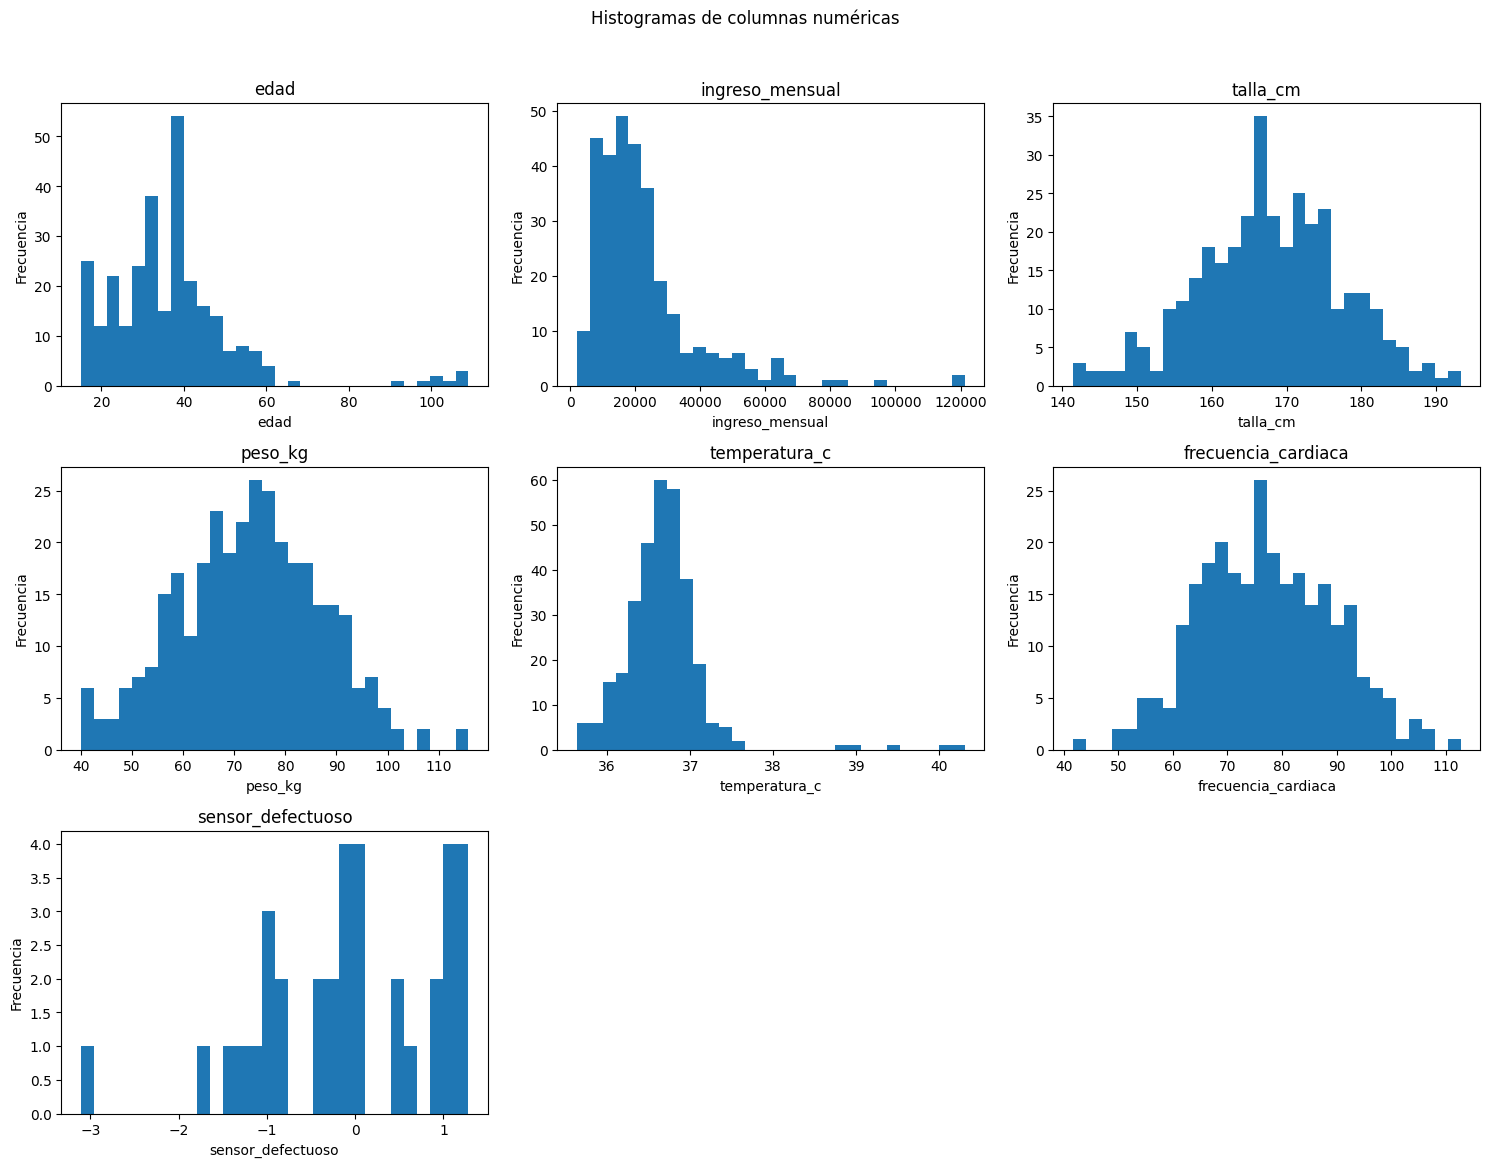

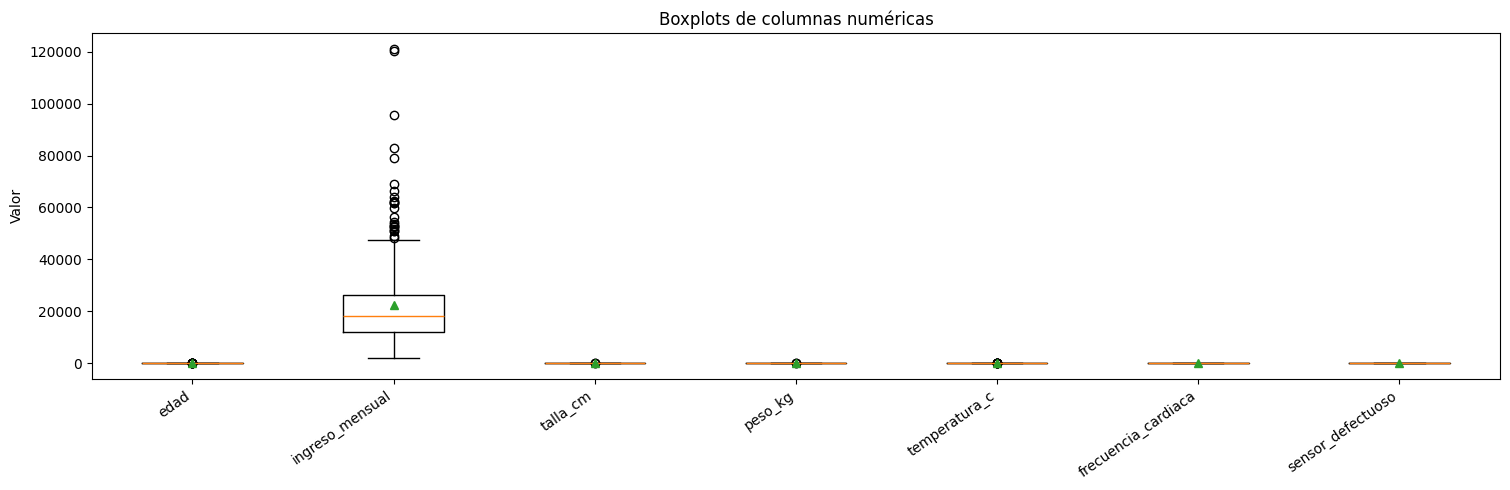

In [132]:
# 1) Separacion de Columnas Numericas
num_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()
print("Columnas numéricas:", num_cols)

# 2) Definicion de Funciones Auxiliares
# Detection de outliers
def iqr_outlier_stats(s: pd.Series):
    s = pd.to_numeric(s, errors="coerce").dropna()
    if s.empty:
        return 0, 0.0, np.nan, np.nan, np.nan, np.nan
    q1, q3 = s.quantile(0.25), s.quantile(0.75)
    iqr = q3 - q1
    lim_inf, lim_sup = q1 - 1.5*iqr, q3 + 1.5*iqr
    number_outlier_detected = int(((s < lim_inf) | (s > lim_sup)).sum())
    proportion_outliers_respect_total = number_outlier_detected / len(s)

    return number_outlier_detected, proportion_outliers_respect_total, q1, q3, lim_inf, lim_sup

# Detecta si parece estar acotada en [0,1] o [0,100]
def bounded_guess(s: pd.Series):
    s = pd.to_numeric(s, errors="coerce").dropna()
    if s.empty:
        return None
    min_value, max_value = float(s.min()), float(s.max())
    if 0.0 <= min_value and max_value <= 1.0:
        return "[0,1]"
    if 0.0 <= min_value and max_value <= 100.0:
        return "[0,100]"
    return None

if len(num_cols) == 0:
    print("No hay columnas numéricas en X_train.")
else:
    # --------- Figura 1: HISTOGRAMAS (todos en subplots) ----------
    n = len(num_cols)
    ncols = min(3, n)
    nrows = math.ceil(n / ncols)

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5*ncols, 3.8*nrows))
    axes = np.atleast_1d(axes).ravel()
    #Aplico Histograma y Box Plot a la parte de Entrenamiento
    for i, col in enumerate(num_cols):
        s = pd.to_numeric(X_train[col], errors="coerce").dropna()
        ax = axes[i]
        if s.empty:
            ax.text(0.5, 0.5, "Sin datos", ha="center", va="center")
            ax.set_title(col); ax.set_xlabel(col); ax.set_ylabel("Frecuencia")
            ax.set_xticks([]); ax.set_yticks([])
        else:
            ax.hist(s, bins=30)
            ax.set_title(col)
            ax.set_xlabel(col)
            ax.set_ylabel("Frecuencia")

    # Oculta subplots sobrantes
    for j in range(len(num_cols), len(axes)):
        axes[j].axis("off")
    # Guarda Histograma
    fig.suptitle("Histogramas de columnas numéricas", y=1.02, fontsize=12)
    fig.tight_layout()
    fig.savefig("histogramas_numericas.png", dpi=150, bbox_inches="tight")
    plt.show()
    plt.close(fig)

    # --------- Figura 2: BOXPLOTS (todas en un eje) ----------
    series_pairs = []
    for c in num_cols:
        v = pd.to_numeric(X_train[c], errors="coerce").dropna().values
        if v.size > 0:
            series_pairs.append((c, v))

    if len(series_pairs) == 0:
        print("No hay datos numéricos válidos para boxplots. No se genera boxplot.")
        box_path = None
    else:
        labels = [c for c, _ in series_pairs]
        values = [v for _, v in series_pairs]

        fig2 = plt.figure(figsize=(1.6*len(labels)+4, 5))
        plt.boxplot(values, vert=True, showmeans=True)
        plt.xticks(ticks=range(1, len(labels)+1), labels=labels, rotation=35, ha="right")
        plt.ylabel("Valor")
        plt.title("Boxplots de columnas numéricas")
        plt.tight_layout()
        fig2.savefig("boxplots_numericas.png", dpi=150, bbox_inches="tight")
        plt.show()
        plt.close(fig2)


## h) Realizar Diagnostico Numerico + Heuristica

### Heurística de imputación (recom_imputer)
- Si hay **muchos atípicos** (outliers_% ≥ 5%) o **fuerte asimetría** (|skew| ≥ 1.0) ⇒ usar **median**.
- En otro caso ⇒ usar **mean**.

### Heurística de escalado (recom_scaler)
- Si outliers_% ≥ 5% ⇒ usar **RobustScaler**.
- Si no hay muchos outliers y la distribución es casi simétrica (|skew| ≤ 0.5) ⇒ usar **StandardScaler**.
- En cualquier otro caso ⇒ usar **MinMaxScaler** (por defecto).

In [133]:
diagnostico = []
for c in num_cols:
    s = pd.to_numeric(X_train[c], errors="coerce")
    number_outlier_detected, proportion_outliers_respect_total, q1, q3, li, ls = iqr_outlier_stats(s)
    bounds = bounded_guess(s)
    #Calcula el porcentaje de valores faltantes
    miss_pct = s.isna().mean() * 100
    #Elimina valores faltantes
    s_no_na = s.dropna()
    #Calcula la asimetria de la distribucion
    skew = s_no_na.skew() if s_no_na.size > 1 else np.nan
    #Calcula la curtosis
    kurt = s_no_na.kurt() if s_no_na.size > 1 else np.nan

    # Heurística de imputación
    # Verifica que el valor de la asimetria(skew) no sea NaN
    # abs(skew) calcula el valor absoluto de la asimetria
    if (proportion_outliers_respect_total >= 0.05) or (pd.notna(skew) and abs(skew) >= 1.0):
        imputador = "median"
    else:
        imputador = "mean"

    # Heurística de escalado
    if proportion_outliers_respect_total >= 0.05:
        escalador = "RobustScaler"
    elif pd.notna(skew) and abs(skew) <= 0.5:
        escalador = "StandardScaler"
    else:
        escalador = "MinMaxScaler"  # por defecto en casos no normales o acotados

    diagnostico.append({
        "columna": c,
        "missing_%": round(miss_pct, 2),
        "skew": round(skew, 3) if pd.notna(skew) else np.nan,
        "kurtosis": round(kurt, 3) if pd.notna(kurt) else np.nan,
        "outliers_n": number_outlier_detected,
        "outliers_%": round(proportion_outliers_respect_total*100, 2),
        "q1": q1, "q3": q3, "IQR": (q3 - q1),
        "lim_inf": li, "lim_sup": ls,
        "bounded": bounds,
        "recommended_imputer": imputador,
        "recommended_scaler": escalador,
    })

diag_df = pd.DataFrame(diagnostico).sort_values(["outliers_%","missing_%"], ascending=False)
print("\n=== Diagnóstico numérico (heurística) ===\n")
# Aumenta el ancho máximo de columnas impresas
pd.set_option('display.width', 1000)

# Permite mostrar más columnas sin truncar
pd.set_option('display.max_columns', None)

# Muestra más filas si lo necesitas
pd.set_option('display.max_rows', None)

# Reinicar el Indice
diag_df = diag_df.reset_index(drop=True)
# Imprimir DataFrame
print(diag_df)

# Sugerencias para columnas numéricas
suggest_mean_rob = diag_df.query("recommended_imputer=='mean' and recommended_scaler=='RobustScaler'")["columna"].tolist()
suggest_med_rob  = diag_df.query("recommended_imputer=='median' and recommended_scaler=='RobustScaler'")["columna"].tolist()
suggest_med_min  = diag_df.query("recommended_imputer=='median' and recommended_scaler=='MinMaxScaler'")["columna"].tolist()
suggest_med_std  = diag_df.query("recommended_imputer=='median' and recommended_scaler=='StandardScaler'")["columna"].tolist()
suggest_mean_min = diag_df.query("recommended_imputer=='mean' and recommended_scaler=='MinMaxScaler'")["columna"].tolist()
suggest_mean_std = diag_df.query("recommended_imputer=='mean' and recommended_scaler=='StandardScaler'")["columna"].tolist()

print("#"*190)
print("\nSugerencias de columnas numéricas")
print("Imputador + Escalador: Selección de Columnas")
print(f"{'median + Robust':<21}: {suggest_med_rob}")
print(f"{'median + MinMax':<21}: {suggest_med_min}")
print(f"{'median + Standard':<21}: {suggest_med_std}")
print(f"{'mean + Robust':<21}: {suggest_mean_rob}")
print(f"{'mean + MinMax':<21}: {suggest_mean_min}")
print(f"{'mean + Standard':<21}: {suggest_mean_std}")


=== Diagnóstico numérico (heurística) ===

               columna  missing_%   skew  kurtosis  outliers_n  outliers_%            q1            q3           IQR      lim_inf       lim_sup  bounded recommended_imputer recommended_scaler
0      ingreso_mensual      18.93  2.509     9.280          24        7.89  12193.250000  26335.750000  14142.500000 -9020.500000  47549.500000     None              median       RobustScaler
1                 edad      23.20  2.009     6.932           9        3.12     28.000000     42.000000     14.000000     7.000000     63.000000     None              median       MinMaxScaler
2        temperatura_c      15.73  3.031    18.198           8        2.53     36.418454     36.872642      0.454188    35.737171     37.553924  [0,100]              median       MinMaxScaler
3              peso_kg      12.27  0.024    -0.169           2        0.61     63.940191     82.726023     18.785832    35.761443    110.904770     None                mean     StandardSca

## i) Seleccion de Columnas numericas que se le va aplicar el imputador + escalador

In [134]:
"""
Gracias a que las columnas ingreso mensual, edad y temperatura tienen un skew ≥ 1.0 se usaran los metodos de medianas con minmax pero como ingreso mensual ademas tiene outliers_% ≥ 5%
Usaremos robutness en el, para las demas que no  tienen un skew que supere 1.0 o un porcentaje alto de outliers se usara la media con standar.
"""

num_med_rob_cols = ['ingreso_mensual']   # mediana + Robust
num_med_min_cols = ['edad', 'temperatura_c']   # mediana + MinMax
#num_med_std_cols = []   # mediana + Estandar
#num_mean_rob_cols = []  # media + Robust
#num_mean_min_cols = []  # media + MinMax
num_mean_std_cols  = ['peso_kg', 'talla_cm', 'frecuencia_cardiaca'] # media + Standard
"""
En el caso de sensor defectuoso lo eliminaremos por el alto porcentaje de datos faltantes y por ultimo no haremos nada con referencia ya que al ser
referencias unicas, hacerle onehot no tendria sentido al crear una nueva columna para cada referencia con una sola coincidencia pero tampoco tiene una
preferencia una sobre otra como para aplicar ordinal.
"""
passthrough_cols = ["referencia"]              # pasar sin procesar
drop_cols       = ['sensor_defectuoso']

## j) Seleccion de Columnas Categoricas que se les va aplicar el codificador

In [135]:
cat_ohe_cols = ["ciudad","codigo_serie"]      # moda + OneHot
cat_ord_cols = ["nivel","tipo_servicio"]        # moda + Ordinal

## k) Busqueda de Valores Unicos en Columnas Categoricas Selecciondas Previamente

In [136]:
print(df["nivel"].dropna().unique())
print('----'* 5)
print(df["tipo_servicio"].dropna().unique())

['alto' 'medio' 'bajo']
--------------------
['basico' 'estandar' 'premium']


In [137]:
# Definicion de categorias ordinales
categorias_ordinales = [
    ["bajo","medio","alto"],
    ["basico","estandar","premium"]
 ]


## l) Preparar el Pipeline

In [138]:
# --- Pipelines NUMÉRICOS ---
pipe_med_rob = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler",  RobustScaler())
])

pipe_med_min = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler",  MinMaxScaler())
])

'''pipe_med_std = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler",  StandardScaler())
])'''


'''pipe_mean_rob = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler",  RobustScaler())
])'''

'''pipe_mean_min = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler",  MinMaxScaler())
])'''

pipe_mean_std = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler",  StandardScaler())
])


In [139]:
# --- Pipelines CATEGÓRICOS ---
pipe_cat_ohe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),  # moda
    ("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

pipe_cat_ord = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),  # moda
    ("encoder", OrdinalEncoder(categories=categorias_ordinales,
                               handle_unknown="use_encoded_value", unknown_value=-1))
])

In [140]:
# --- ColumnTransformer unificado ---
preprocessor = ColumnTransformer(
    transformers=[
        ("num_med_rob", pipe_med_rob, num_med_rob_cols),
        ("num_med_min", pipe_med_min, num_med_min_cols),
        #("num_med_std", pipe_med_std, num_med_std_cols),
        #("num_mean_rob",  pipe_mean_rob,  num_mean_rob_cols),
        #("num_mean_min",  pipe_mean_min,  num_mean_min_cols),
        ("num_mean_std",  pipe_mean_std,  num_mean_std_cols),

        # Categóricos
        ("cat_ohe",      pipe_cat_ohe,  cat_ohe_cols),
        ("cat_ord",      pipe_cat_ord,  cat_ord_cols),

        # Passthrough (sin preprocesar)
        ("passthrough",  "passthrough", passthrough_cols),

        # Drop explícito
        ("drop_high_na", "drop",        drop_cols),
    ],
    verbose_feature_names_out=False
)

## m) Ajuste y Transformacion solo para datos de entrenamiento

In [141]:
# ---------- Ajuste y transformación ----------
preprocessor.fit(X_train)

X_train_proc = preprocessor.transform(X_train)
X_test_proc  = preprocessor.transform(X_test)

print("Shape train ->", X_train_proc.shape)
print("Shape test  ->", X_test_proc.shape)


Shape train -> (375, 17)
Shape test  -> (125, 17)


## n) Analisis de Tablas Preprocesadas

In [142]:
# Reconstruir DataFrame con nombres de columnas
cols_out = preprocessor.get_feature_names_out()
X_train_proc_df = pd.DataFrame(X_train_proc, columns=cols_out)
X_test_proc_df = pd.DataFrame(X_test_proc, columns=cols_out)
X_test_proc_df

X_train_proc_df.head()

,ingreso_mensual,edad,temperatura_c,peso_kg,talla_cm,frecuencia_cardiaca,ciudad_CDMX,ciudad_Guadalajara,ciudad_Monterrey,ciudad_Puebla,ciudad_Toluca,codigo_serie_X,codigo_serie_Y,codigo_serie_Z,nivel,tipo_servicio,referencia
0,0.823288,0.148936,0.207999,0.247459,-2.090468,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,2.0,REF-931711
1,-0.957579,0.340426,0.078537,1.352001,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,REF-621328
2,0.0,0.202128,0.264614,-0.781908,-0.270125,-0.898576,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,REF-836665
3,-0.608977,0.223404,0.219283,1.523255,-1.567863,-0.457336,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,REF-634251
4,3.081713,0.0,1.0,-0.550561,-0.356724,-0.156571,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,REF-891035


In [143]:
X_train_proc_df.to_csv("Entrenamiento_procesado.csv",index=False)
X_test_proc_df.to_csv("Prueba_procesado.csv",index=False)

## n) Analisis de Tablas Preprocesadas

In [144]:
# num_mean_std_cols  = ['temperatura_c', 'edad', 'frecuencia_cardiaca', 'ingreso_mensual', 'peso_kg', 'talla_cm'] # media + Standard

cols_escaladas_numericas_usuario = ['temperatura_c', 'edad', 'frecuencia_cardiaca', 'ingreso_mensual', 'peso_kg', 'talla_cm',]

In [145]:
cols = [c for c in cols_escaladas_numericas_usuario if c in X_train_proc_df.columns]
print(f"Columnas escaladas encontradas en X_train_proc_df: {cols}")

if len(cols) == 0:
    print("No hay columnas escaladas válidas en X_train_proc_df. No se generan imágenes.")
else:
    # ---------- Figura 1: HISTOGRAMAS (todas en subplots) ----------
    n = len(cols)
    ncols = min(3, n)
    nrows = math.ceil(n / ncols)

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5*ncols, 3.8*nrows))
    axes = np.atleast_1d(axes).ravel()

    for i, col in enumerate(cols):
        s = pd.to_numeric(X_train_proc_df[col], errors="coerce").dropna()
        ax = axes[i]
        if s.empty:
            ax.text(0.5, 0.5, "Sin datos", ha="center", va="center")
            ax.set_title(col); ax.set_xlabel(col); ax.set_ylabel("Frecuencia")
            ax.set_xticks([]); ax.set_yticks([])
        else:
            ax.hist(s, bins=30)
            ax.set_title(col)
            ax.set_xlabel(col)
            ax.set_ylabel("Frecuencia")

    # Ocultar subplots sobrantes
    for j in range(len(cols), len(axes)):
        axes[j].axis("off")

    fig.suptitle("Histogramas (columnas escaladas)", y=1.02, fontsize=12)
    fig.tight_layout()
    hist_file = "Scaled_Histogramas.png"
    fig.savefig(hist_file, dpi=150, bbox_inches="tight")
    plt.close(fig)

    # ---------- Figura 2: BOXPLOTS (todas en un solo eje) ----------
    series_pairs = []
    for c in cols:
        v = pd.to_numeric(X_train_proc_df[c], errors="coerce").dropna().values
        if v.size > 0:
            series_pairs.append((c, v))

    if len(series_pairs) == 0:
        print("No hay datos válidos para boxplots. No se genera boxplot.")
        box_file = None
    else:
        labels = [c for c, _ in series_pairs]
        values = [v for _, v in series_pairs]

        fig2 = plt.figure(figsize=(1.6*len(labels)+4, 5))
        plt.boxplot(values, vert=True, showmeans=True)
        plt.xticks(ticks=range(1, len(labels)+1), labels=labels, rotation=35, ha="right")
        plt.ylabel("Valor")
        plt.title("Boxplots (columnas escaladas)")
        plt.tight_layout()
        box_file = "Scaled_BoxPlots.png"
        fig2.savefig(box_file, dpi=150, bbox_inches="tight")
        plt.close(fig2)




Columnas escaladas encontradas en X_train_proc_df: ['temperatura_c', 'edad', 'frecuencia_cardiaca', 'ingreso_mensual', 'peso_kg', 'talla_cm']
Imágenes guardadas:
 - Scaled_Histogramas.png
 - Scaled_BoxPlots.png


## p) Conclusiones Finales

La practica fue bastante facil de realizar gracias a los recursos brindados por el profesor. El punto más crucial fue tener cuidado al momento de declarar correctamente qué columnas son numéricas y cuáles son ordinales/categóricas, ya que de esa selección depende todo el pipeline. El uso de pipelines nos facilitó bastante el proceso, además, ayuda a evitar la fuga de datos.